# NLP Capstone Project: Airline Sentiment Analysis from Twitter Data

## Data Loading and Exploration

In [1]:
import pandas as pd

In [2]:
sentiment_df = pd.read_csv('sentiment_analysis/data/raw/Tweets.csv')
sentiment_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
from ydata_profiling import ProfileReport

sentiment_data_profile = ProfileReport(sentiment_df, title="Raw sentiment data report")

sentiment_data_profile.config.vars.num.low_categorical_threshold = 20

sentiment_data_profile.to_file('sentiment_analysis/data/reports/raw_sentiment_data_profile.html')

D:\GitHub repos\sentiment-analysis-nlp-training\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 39.84it/s]


In [7]:
from IPython.display import HTML

# HTML(filename="sentiment_analysis/data/reports/raw_sentiment_data_profile.html")

## Text cleaning

In [9]:
# Make copy of original data
df = sentiment_df.copy()



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)
    
    # Remove mentions (@username) and hashtags (#hashtag)
    text = re.sub(r"@\w+|#\w+", "", text)
    
    # Remove special characters and digits, keep only letters and whitespace
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Lemmatize tokens and remove stopwords
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    
    # Join tokens back into a single string
    return " ".join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...


In [12]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Omkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [13]:
df['clean_text'] = sentiment_df['text'].apply(clean_text)
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus youve added commercial experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),didnt today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,thank got different flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,leaving minute late flight warning communicati...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,please bring american airline
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight dont answer phone suggesti...


In [19]:
clean_text_df = df.copy()
clean_text_df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),said
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus youve added commercial experience tacky
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),didnt today must mean need take another trip
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN,thank got different flight chicago
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN,leaving minute late flight warning communicati...
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN,please bring american airline
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada),money change flight dont answer phone suggesti...


## Data Preparation

In [ ]:
sentiment_df = df.copy()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your cleaned DataFrame
sentiment_df = pd.read_csv('sentiment_analysis/data/raw/Tweets.csv')
sentiment_df['clean_text'] = sentiment_df['text'].apply(clean_text)  

# Encode sentiment labels
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
sentiment_df['sentiment_label'] = sentiment_df['airline_sentiment'].map(label_mapping)

# Select features & target
X = sentiment_df['clean_text']
y = sentiment_df['sentiment_label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y                # preserve class balance
)

train_df = pd.DataFrame({'clean_text': X_train, 'sentiment_label': y_train})
test_df  = pd.DataFrame({'clean_text': X_test,  'sentiment_label': y_test})

# Save splits for reproducibility
train_df.to_csv('sentiment_analysis/data/interim/train.csv', index=False)
test_df.to_csv('sentiment_analysis/data/interim/test.csv',  index=False)


print(f"Train/test split saved: {train_df.shape[0]} train, {test_df.shape[0]} test examples.")


Train/test split saved: 11712 train, 2928 test examples.


## Feature Engineering

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

train_df = pd.read_csv('sentiment_analysis/data/interim/train.csv')
test_df  = pd.read_csv('sentiment_analysis/data/interim/test.csv')

# Drop rows with missing or empty clean_text
train_df = train_df.dropna(subset=['clean_text'])
test_df  = test_df.dropna(subset=['clean_text'])
train_df = train_df[train_df['clean_text'].str.strip() != ""]
test_df  = test_df[test_df['clean_text'].str.strip() != ""]

X_train_text = train_df['clean_text'].tolist()
X_test_text  = test_df['clean_text'].tolist()
y_train = train_df['sentiment_label']
y_test  = test_df['sentiment_label']

# TF-IDF vectorizer
tfidf_vec = TfidfVectorizer(
    lowercase=False,
    ngram_range=(1, 2),
    max_df=0.95,
    min_df=5,
    max_features=10_000
)

# Fit and transform
X_train_tfidf = tfidf_vec.fit_transform(X_train_text)
X_test_tfidf  = tfidf_vec.transform(X_test_text)

print("TF-IDF shapes:")
print(f"  X_train: {X_train_tfidf.shape}")
print(f"  X_test:  {X_test_tfidf.shape}")

# Save splits
train_df.to_csv('sentiment_analysis/data/interim/train_tfidf.csv', index=False)
test_df.to_csv('sentiment_analysis/data/interim/test_tfidf.csv', index=False)


TF-IDF feature matrix shapes:
  X_train: (11694, 3722)
  X_test:  (2920, 3722)


['sentiment_analysis/models/tfidf_vectorizer.joblib']

## Model Building

Fitting 5 folds for each of 2408 candidates, totalling 12040 fits

Best params found:
{'C': 1, 'class_weight': {0: 1, 1: 3, 2: 4}}

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      1833
     neutral       0.60      0.63      0.61       614
    positive       0.73      0.68      0.71       473

    accuracy                           0.78      2920
   macro avg       0.73      0.72      0.73      2920
weighted avg       0.79      0.78      0.79      2920

Overall metrics:
  Accuracy : 0.785
  Precision: 0.730
  Recall   : 0.725
  F1-score : 0.727


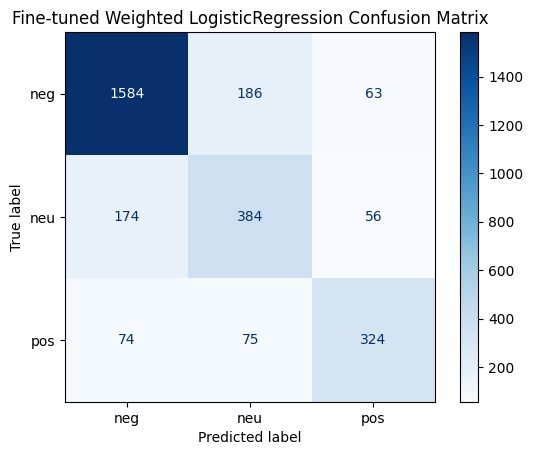


Saved fine-tuned model → sentiment_analysis/models/logreg_weighted_finetuned.joblib


In [ ]:
import joblib
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    accuracy_score
)
import matplotlib.pyplot as plt

# Base classifier
base_clf = LogisticRegression(solver='liblinear', max_iter=1000)

# Class weight grid
weight_factors = [0.5, 1, 2, 3, 4, 5, 6]
cw_grid = []
for w_neu in weight_factors:
    for w_pos in weight_factors:
        for w_neg in weight_factors:
            cw_grid.append({0: w_neg, 1: w_neu, 2: w_pos})
cw_grid.append('balanced')

# Parameter grid
param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 2, 3, 4],
    'class_weight': cw_grid
}

# Grid search with macro-F1
grid = GridSearchCV(
    estimator=base_clf,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("\nBest params found:")
print(grid.best_params_)
best_clf = grid.best_estimator_

# Evaluate on test set
y_pred = best_clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(
    y_test, y_pred,
    target_names=['negative','neutral','positive']
))

acc = accuracy_score(y_test, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average='macro'
)
print(f"Overall metrics:\n"
      f"  Accuracy : {acc:.3f}\n"
      f"  Precision: {prec:.3f}\n"
      f"  Recall   : {rec:.3f}\n"
      f"  F1-score : {f1:.3f}")

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['neg','neu','pos']
)
disp.plot(cmap=plt.cm.Blues)
plt.title("Weighted LogisticRegression Confusion Matrix")
plt.show()

# Save model
joblib.dump(best_clf, 'sentiment_analysis/models/logreg_weighted_finetuned.joblib')
print("\nSaved fine-tuned model → sentiment_analysis/models/logreg_weighted_finetuned.joblib")


## Creating pipeline

In [ ]:
import re
import joblib
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Text cleaning transformer
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.url_pattern   = re.compile(r"http\S+|www\S+")
        self.mention_hash  = re.compile(r"(@\w+|#\w+)")
        self.special_chars = re.compile(r"[^a-zA-Z\s]")
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        cleaned = []
        for doc in X:
            text = doc if isinstance(doc, str) else ""
            text = self.url_pattern.sub("", text)
            text = self.mention_hash.sub("", text)
            text = self.special_chars.sub("", text)
            cleaned.append(text.lower().strip())
        return cleaned

# Load data
df = pd.read_csv('sentiment_analysis/data/raw/Tweets.csv')
df['clean_text'] = df['text'].apply(lambda t: t if isinstance(t, str) else "")

X = df['clean_text']
y = df['airline_sentiment'].map({'negative':0, 'neutral':1, 'positive':2})

# Build pipeline
pipeline = Pipeline([
    ('cleaner', TextCleaner()), 
    ('tfidf', TfidfVectorizer(
        lowercase=False,
        ngram_range=(1,2),
        max_df=0.95,
        min_df=5,
        max_features=10000
    )),
    ('clf', LogisticRegression(
        solver='liblinear',
        max_iter=1000,
        C=1,
        class_weight={0:1, 1:3, 2:4}
    ))
])

# Fit pipeline
pipeline.fit(X, y)

# Save pipeline
joblib.dump(pipeline, 'sentiment_analysis/models/sentiment_pipeline_weighted.joblib')
joblib.dump(pipeline, 'sentiment_analysis/models/sentiment_pipeline_weighted.joblib')
print("Saved pipeline → sentiment_analysis/models/sentiment_pipeline_weighted.joblib")


Saved pipeline → sentiment_analysis/models/sentiment_pipeline_weighted.joblib


In [50]:
import joblib
pipeline = joblib.load('sentiment_analysis/models/sentiment_pipeline_weighted.joblib')
preds = pipeline.predict(["I love flying with this airline!", "Worst experience ever.", "It was ok"])
print(preds)  # [2, 0] for positive, negative


[2 0 1]


Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.76      0.84      1835
     neutral       0.56      0.81      0.67       620
    positive       0.70      0.81      0.75       473

    accuracy                           0.78      2928
   macro avg       0.73      0.79      0.75      2928
weighted avg       0.82      0.78      0.79      2928

Accuracy: 0.7783469945355191


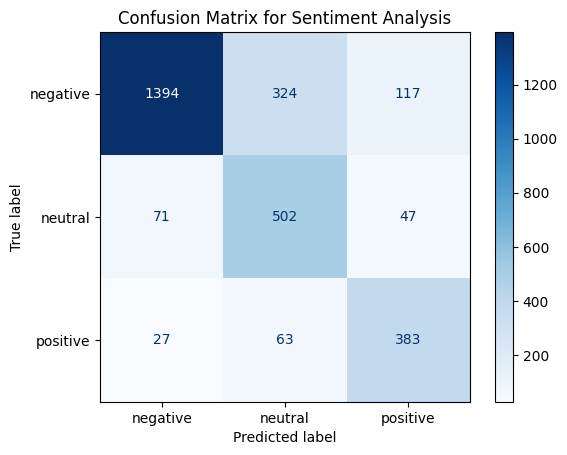

In [53]:
# Load the test data and make predictions and evaluate the metrics 
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
# Load the test data
test_df = pd.read_csv('sentiment_analysis/data/interim/test.csv')

# Load the trained pipeline
pipeline = joblib.load('sentiment_analysis/models/sentiment_pipeline_weighted.joblib')

# Make predictions
y_pred = pipeline.predict(test_df['clean_text'])

# Evaluate the model
print("Classification Report:")
print(classification_report(test_df['sentiment_label'], y_pred, target_names=['negative', 'neutral', 'positive']))

print("Accuracy:", accuracy_score(test_df['sentiment_label'], y_pred))

# Save the predictions to a CSV file
predictions_df = pd.DataFrame({
    'text': test_df['clean_text'],
    'true_label': test_df['sentiment_label'],
    'predicted_label': y_pred
})

predictions_df.to_csv('sentiment_analysis/data/inference/sentiment_predictions.csv', index=False)

# Create confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_df['sentiment_label'], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'neutral', 'positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Sentiment Analysis")
plt.show()
